In [1]:
# load and modify the data 

import matplotlib.pyplot as plt
import ast
import re
import seaborn as sns

name = "0010"

file_name = f"gyro_data/gyro_data_{name}.txt"

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

def modify_data(data, expected_length=19):

    # convert to integer
    serial_data = ast.literal_eval(data)

    # Define a regular expression pattern to match valid strings
    valid_pattern = re.compile(r'^-?\d+$')  

    # Filter out entries with invalid strings or empty strings
    filtered_data = [row for row in serial_data if all(valid_pattern.match(value.strip()) for value in row) and all(value.strip() for value in row)]

    # Check each entry for the correct number of values
    incorrect_entries = []
    for index, entry in enumerate(filtered_data):
        if len(entry) != expected_length:
            print(f"Entry at index {index} has {len(entry)} values instead of {expected_length}.")
            incorrect_entries.append(index)
    
    # Remove entries with incorrect number of values
    for index in sorted(incorrect_entries, reverse=True):
        del filtered_data[index]
    
    stripped_data = [[int(value.strip()) for value in row] for row in filtered_data]  

    # transpose the data 
    # [accX, ma_accX, dev_accX, accY, ... , dev_accZ, gyrX, ma_gyrX, dev_gyrX, gyrY, ... , dev_gyrZ, acc_vec]
    transposed_data = list(map(list, zip(*stripped_data)))    

    return transposed_data


with open(file_name, "r") as file:
    serial_data = file.read()


data = modify_data(serial_data)

# for d in data:
#     print(d)

[150, 235, 321, 335, 267, 187, 94, 3, -13, 127, 60, -1, 2052, 5492, 10184, 14496, 15464, 8806, -549, -11077, -20868, -22781, -18973, -11802, -4007, 3804, 6689, 7602, 6708, 4413, 2330, 826, 969, 685, 956, 508, 73, -276, -463, -426, -192, -77, -9, 72, -93, -82, -148, -139, -108, -86, -82, -59, 17, 23, 105, 124, 141, 94, 23, -24, -73, -120, -136, -111, -133, -78, -41, -9, 57, 85, 85, 88, 57, 13, -3, -16, -11, 37, 97, 79, 136, 469, 855, 910, 1201, -402, -3009, -6194, -6492, -6309, -2711, 1792, 4291, 5234, 4479, 3012, 931, 1146, 468, 641, 22, -131, -111, -216, -94, -67, -75, -50, -14, -6, -3, -4, -10, -6, -2, 3, 6, 8, 8, 6, 4, -1, -8, -14, -18, -15, -10, -7, 0, 1, 1, -1, 2, 3, 4, 9, 5, 4, -1, -2, -5, -3, 0, 3, 8, 3, -3, -30, -64, -150, -384, 1009, 4240, 7968, 12536, 12850, 8742, 1082, -7266, -14894, -16787, -13789, -8783, -1879, 2893, 5336, 4933, 3943, 1514, -122, -660, -585, -249, -229, -337, -480, -438, -327, -172, -39, 62, 145, 201, 203, 160, 170, 79, 56, 101, 75, -62, -165, -287, -349, 

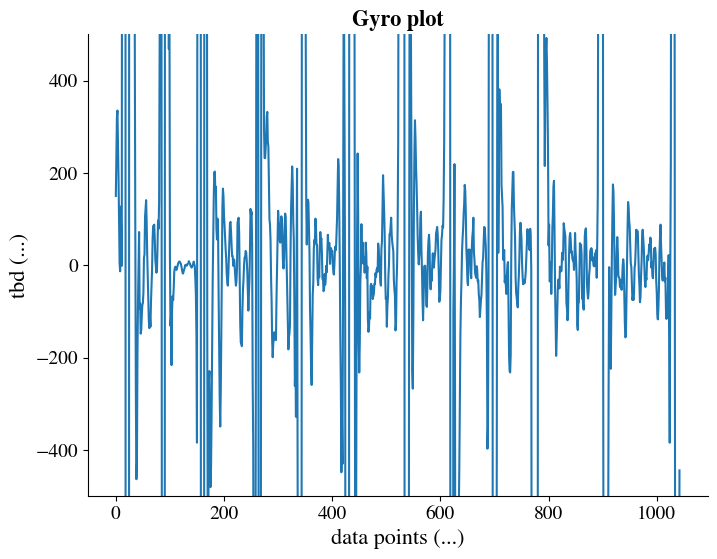

<Figure size 640x480 with 0 Axes>

In [5]:
# plot the data 

fig, ax = plt.subplots(figsize=(8,6))

selection_raw = [0, 3, 6, 9, 12, 15]
selection_averages = [1, 4, 7, 10, 13, 16]
selection_deviation = [2, 5, 8, 11, 14, 17]

print(data[17])
x = [i for i in range(len(data[17]))]

# for i in selection_deviation:
#     plt.plot(x, transposed_data[i])

plt.plot(x, data[17])
plt.title('Gyro plot', fontsize=16, weight='bold')
plt.xlabel(r'data points (...)', fontsize=16)
plt.ylabel(r'tbd (...)',fontsize=16)

sns.despine()

plt.ylim(-500,500)
plt.show()
plt.savefig(fname='name_fig.pdf')

